## 1. data cleaning

Import Boston Marathon results from 2001 to 2017 (excluding 2013) as raw data in csv files

In [2]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.16.2
0.24.2


Since data before and after 2013 comes from different sources, I will clean them separately. Data from 2014 is a little bit from both worlds. I will also pick it our alone and put it back separately.

In [258]:
# data before 2013
file_name = 'Raw Data/{}.csv'
df_list = []
for i in range(2001, 2013):
    df_i = pd.read_csv(file_name.format(i))
    df_i['Year'] = i
    df_i.columns = [name.capitalize() for name in list(df_i.columns)]
    df_list.append(df_i)

df_part1 = pd.concat(df_list)
df_part1.head()

,Division,Name,City,Gender,Age,Official,Bib,Overall,State,Genderdiv,Net,Country,Year
0,2 / 32,"Nietlispach, Franz",Zeiningen,M,43,91.37,W1,2 / 35,NaN,2 / 29,91.37,SUI,2001
1,1 / 3254,"Ndereba, Catherine",Nairobi,F,28,143.88,F1,27 / 13408,NaN,1 / 4814,143.88,KEN,2001
2,15 / 3945,"Lagat, Elijah",Nandi District,M,34,137.98,1,17 / 13408,NaN,17 / 8594,137.98,KEN,2001
3,14 / 3945,"Abera, Gezahegne",Addis Ababa,M,22,137.07,2,16 / 13408,NaN,16 / 8594,137.07,ETH,2001
4,3 / 32,"Frei, Heinz",Etziken,M,43,91.97,W2,3 / 35,NaN,3 / 29,91.97,SUI,2001


In [3]:
# data after 2015
file_name = 'Raw Data/{}.csv'
df_list = []
for i in range(2015, 2018):
    df_i = pd.read_csv(file_name.format(i))
    df_i['Year'] = i
    df_i.columns = [name.capitalize() for name in list(df_i.columns)]
    df_list.append(df_i)

df_part2 = pd.concat(df_list)
df_part2 = df_part2.rename(columns={'M/f': 'Gender', 'Official time': 'Official', 'Gender': 'Genderdiv'})
df_part2.head()

,Bib,Name,Age,Gender,City,State,Country,Citizen,5k,10k,...,30k,35k,40k,Pace,Proj time,Official,Overall,Genderdiv,Division,Year
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,0:14:43,0:29:43,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,0:14:43,0:29:44,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,0:14:43,0:29:44,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015


## 2. Elite runner analysis -- not relevant to this project

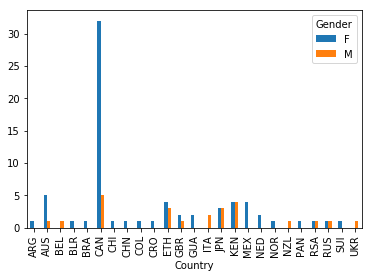

In [4]:
import datetime
df_2015_1 = df_part2.loc[(df_part2.Year == 2015) & (df_part2.Official < "2:35") & (df_part2.Gender == "M") & (df_part2.Country != "USA")]
df_2015_2 = df_part2.loc[(df_part2.Year == 2015) & (df_part2.Official < "3:10") & (df_part2.Gender == "F") & (df_part2.Country != "USA")]
df_2015_conc = pd.concat([df_2015_1, df_2015_2]).groupby(["Country", "Gender"])
df_2015_conc.size().unstack().plot(kind="bar")
#df_2015_conc
#ax = df_2015_conc.groupby("Gender")['Country'].value_counts().plot(kind='bar', figsize=(14,8), title="Number for each coutry")
#ax.set_xlabel("Coutry Names")
#ax.set_ylabel("Frequency")

## A function to convert hh:mm:ss -- > mm

In [5]:
def convert_Pace(raw_time):
    """ This function converts input string of raw time in
        hh:mm:ss format to mm.mm float.
    """
    
    if raw_time == np.nan:
        return np.nan
    elif ':' not in raw_time:
        return np.nan
    else:
        hours, minutes, seconds = raw_time.split(':')
        return int(hours)*60 + int(minutes) + int(seconds)/60



## change the time format

In [6]:
df_part2['Official'] = df_part2['Official'].apply(convert_Pace)
for col in ['5k', '10k', '15k', '20k', 'Half', '25k', '30k', '35k', '40k', 'Pace']:
    df_part2[col] = df_part2[col].apply(convert_Pace)

df_2015_M = df_part2[(df_part2.Gender=='M') & (df_part2.Year==2015)]
df_2015_M.quantile(.33)

Age            39.000000
5k             21.966667
10k            43.766667
15k            65.650000
20k            87.868333
Half           92.733333
25k           110.307167
30k           133.663167
35k           157.933333
40k           182.450000
Pace            7.383333
Official      193.333333
Overall      5382.800000
Genderdiv    4812.400000
Division      707.000000
Year         2015.000000
Name: 0.33, dtype: float64

## calculate the pace (5k, 10k, 15k, 20k, half, 25k, 30k, 35k, 40k, finish)
### for 2015 and 2016

In [7]:
distance = ['5k', '10k', '15k', '20k', 'Half', '25k', '30k', '35k', '40k', 'Official']
i =0
while i < len(distance):
    if i == 0: # 5k
        df_part2['Pace_{}'.format(distance[i])] = df_part2[distance[i]]/5
    elif i == 4: # Half
        df_part2['Pace_{}'.format(distance[i])] = (df_part2[distance[i]]-df_part2[distance[i-1]])/(42.195/2-20)
    elif i == 5: # 25k
        df_part2['Pace_{}'.format(distance[i])] = (df_part2[distance[i]]-df_part2[distance[i-1]])/(25 - 42.195/2)
    elif i == 9: # Official
        df_part2['Pace_{}'.format(distance[i])] = (df_part2[distance[i]]-df_part2[distance[i-1]])/(42.195-40)
    else:
        df_part2['Pace_{}'.format(distance[i])] = (df_part2[distance[i]]-df_part2[distance[i-1]])/5
    i+=1
df_part2


,Bib,Name,Age,Gender,City,State,Country,Citizen,5k,10k,...,Pace_5k,Pace_10k,Pace_15k,Pace_20k,Pace_Half,Pace_25k,Pace_30k,Pace_35k,Pace_40k,Pace_Official
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,14.716667,29.716667,...,2.943333,3.000000,3.046667,3.106667,3.234624,3.096306,3.176667,3.196667,2.933333,3.022020
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,14.716667,29.716667,...,2.943333,3.000000,3.050000,3.100000,3.234624,3.100577,3.173333,3.200000,2.943333,3.234624
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,14.716667,29.716667,...,2.943333,3.000000,3.046667,3.106667,3.234624,3.096306,3.176667,3.196667,3.006667,3.348519
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,14.716667,29.733333,...,2.943333,3.003333,3.056667,3.093333,3.234624,3.096306,3.176667,3.210000,3.146667,3.189066
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,14.716667,29.733333,...,2.943333,3.003333,3.046667,3.100000,3.234624,3.100577,3.176667,3.196667,3.093333,3.356112
5,9,"Chepkwony, Frankline",30,M,Koibatek,NaN,KEN,NaN,14.733333,29.750000,...,2.946667,3.003333,3.046667,3.100000,3.234624,3.096306,3.176667,3.196667,3.063333,3.447229
6,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,NaN,14.750000,29.750000,...,2.950000,3.000000,3.116667,3.076667,3.037206,3.083493,3.180000,3.223333,3.196667,3.302961
7,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,NaN,14.733333,29.733333,...,2.946667,3.000000,3.050000,3.103333,3.219438,3.096306,3.173333,3.200000,3.396667,3.523159
8,5,"Tola, Tadese",27,M,Addis Ababa,NaN,ETH,NaN,14.716667,29.716667,...,2.943333,3.000000,3.050000,3.100000,3.249810,3.096306,3.176667,3.200000,3.330000,4.069856
9,16,"Shafar, Vitaliy",33,M,Lutsk,NaN,UKR,NaN,15.233333,30.566667,...,3.046667,3.066667,3.103333,3.126667,3.097950,3.121930,3.176667,3.306667,3.310000,3.462415


## 3. 2015  25% quantile and rest of the group

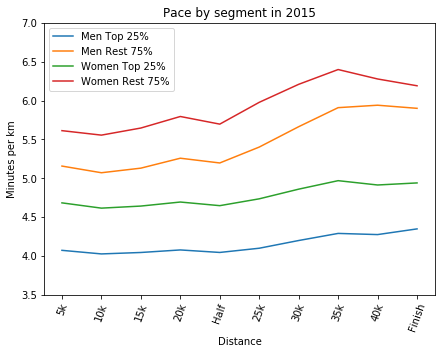

In [55]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by segment in 2015')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70) 
df_2015_m = df_part2.loc[(df_part2.Gender=='M') & (df_part2.Year == 2015)]
df_2015_f = df_part2.loc[(df_part2.Gender=='F') & (df_part2.Year == 2015)]
df_2015_m_25 = df_2015_m.loc[df_2015_m.Official < df_2015_m.Official.quantile(.25)]
df_2015_m_rest = df_2015_m.loc[df_2015_m.Official >= df_2015_m.Official.quantile(.25)]
df_2015_f_25 = df_2015_f.loc[df_2015_f.Official < df_2015_f.Official.quantile(.25)]
df_2015_f_rest = df_2015_f.loc[df_2015_f.Official >= df_2015_f.Official.quantile(.25)]
df_2015_m_25_p = df_2015_m_25.iloc[:, 24:34]
df_2015_m_25_p = df_2015_m_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2015_m_rest_p = df_2015_m_rest.iloc[:, 24:34]
df_2015_m_rest_p = df_2015_m_rest_p.rename(columns=
                                           {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                            'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                            'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2015_f_25_p = df_2015_f_25.iloc[:, 24:34]
df_2015_f_25_p = df_2015_f_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2015_f_rest_p = df_2015_f_rest.iloc[:, 24:34]
df_2015_f_rest_p = df_2015_f_rest_p.rename(columns=
                                           {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                            'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                            'Pace_40k': '40k', 'Pace_Official': 'Finish'})

plt.plot(df_2015_m_25_p.mean(), label='Men Top 25%')
plt.plot(df_2015_m_rest_p.mean(), label='Men Rest 75%')
plt.plot(df_2015_f_25_p.mean(), label='Women Top 25%')
plt.plot(df_2015_f_rest_p.mean(), label='Women Rest 75%')
ax.legend()
ax.set_ylim(3.5, 7.0)
plt.show()

#### Analysis: 
We compared the pace by distance between the top 25% runners and the rest of the runners in 2015. Although both groups show the drop of the pace in the second half, the pace of top 25% runners are more stable than rest of the runners. 

## 4. 2016 25% quantile and the rest of the group

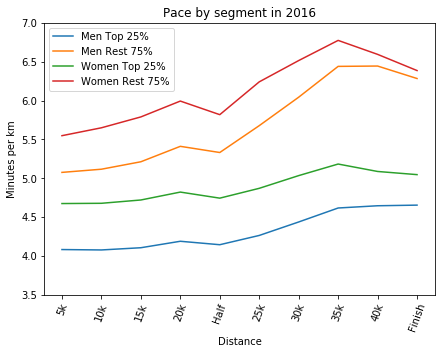

In [56]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by segment in 2016')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70)        
df_2016_m = df_part2.loc[(df_part2.Gender=='M') & (df_part2.Year == 2016)]
df_2016_f = df_part2.loc[(df_part2.Gender=='F') & (df_part2.Year == 2016)]
df_2016_m_25 = df_2016_m.loc[df_2016_m.Official < df_2016_m.Official.quantile(.25)]
df_2016_m_rest = df_2016_m.loc[df_2016_m.Official >= df_2016_m.Official.quantile(.25)]
df_2016_f_25 = df_2016_f.loc[df_2016_f.Official < df_2016_f.Official.quantile(.25)]
df_2016_f_rest = df_2016_f.loc[df_2016_f.Official >= df_2016_f.Official.quantile(.25)]
df_2016_m_25_p = df_2016_m_25.iloc[:, 24:34]
df_2016_m_25_p = df_2016_m_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
df_2016_m_rest_p = df_2016_m_rest.iloc[:, 24:34]
df_2016_m_rest_p = df_2016_m_rest_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
df_2016_f_25_p = df_2016_f_25.iloc[:, 24:34]
df_2016_f_25_p = df_2016_f_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
df_2016_f_rest_p = df_2016_f_rest.iloc[:, 24:34]
df_2016_f_rest_p = df_2016_f_rest_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
plt.plot(df_2016_m_25_p.mean(), label='Men Top 25%')
plt.plot(df_2016_m_rest_p.mean(), label='Men Rest 75%')
plt.plot(df_2016_f_25_p.mean(), label='Women Top 25%')
plt.plot(df_2016_f_rest_p.mean(), label='Women Rest 75%')
ax.legend()
ax.set_ylim(3.5, 7.0)
plt.show()

#### Analysis:
In 2016, we can see the same trend as the previous year. However, the drop is more apparent in 2016 for both groups. According to the weather information, it was hotter in 2016. At the time the race started, the temperature was 61F and the it was 71F when the first runner finished in 2016. In contrary, it was 46F at the time race started, and it was also 46F when the first runner finished in 2015. 

From these two year data, we can say the stable pacing is a good strategy for Boston Marathon. Especially, when the temparature is high, it is more likely to drop the pace in the second half. Runners should save the pace to avoid the big drop in the second half especially when the tempareture is high.

## 5. 2017 25% quantile and the rest of the group

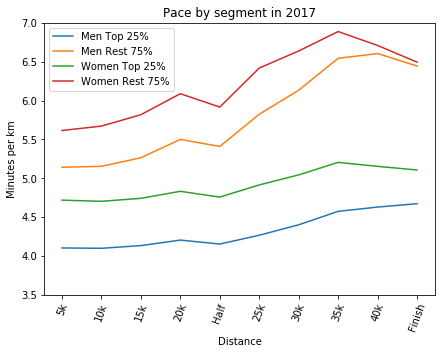

In [57]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by segment in 2017')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70)        
df_2017_m = df_part2.loc[(df_part2.Gender=='M') & (df_part2.Year == 2017)]
df_2017_f = df_part2.loc[(df_part2.Gender=='F') & (df_part2.Year == 2017)]
df_2017_m_25 = df_2017_m.loc[df_2017_m.Official < df_2017_m.Official.quantile(.25)]
df_2017_m_rest = df_2017_m.loc[df_2017_m.Official >= df_2017_m.Official.quantile(.25)]
df_2017_f_25 = df_2017_f.loc[df_2017_f.Official < df_2017_f.Official.quantile(.25)]
df_2017_f_rest = df_2017_f.loc[df_2017_f.Official >= df_2017_f.Official.quantile(.25)]
df_2017_m_25_p = df_2017_m_25.iloc[:, 24:34]
df_2017_m_25_p = df_2017_m_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
df_2017_m_rest_p = df_2017_m_rest.iloc[:, 24:34]
df_2017_m_rest_p = df_2017_m_rest_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
df_2017_f_25_p = df_2017_f_25.iloc[:, 24:34]
df_2017_f_25_p = df_2017_f_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
df_2017_f_rest_p = df_2017_f_rest.iloc[:, 24:34]
df_2017_f_rest_p = df_2017_f_rest_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})
plt.plot(df_2017_m_25_p.mean(), label='Men Top 25%')
plt.plot(df_2017_m_rest_p.mean(), label='Men Rest 75%')
plt.plot(df_2017_f_25_p.mean(), label='Women Top 25%')
plt.plot(df_2017_f_rest_p.mean(), label='Women Rest 75%')
ax.legend()
ax.set_ylim(3.5, 7.0)
plt.show()

## 6. 2014 25% quantile and the rest of the group

In [33]:
df_full = pd.read_csv('Raw Data/df_full.csv')
df_full[df_full.Year == 2014].iloc[:, 11:]

,Year,Total_Runner,5k,10k,20k,Half,25k,30k,35k,40k,Pace,15k,Last_name,First_name
232175,2014,NaN,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,5.3,NaN,Jeptoo,Rita
232176,2014,NaN,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,5.37,NaN,Dibaba,Mare
232177,2014,NaN,16.22,32.58,65.83,69.47,82.45,99.33,116.37,132.95,5.37,NaN,Sumgong,Jemima Jelagat
232178,2014,NaN,15.17,30.48,61.62,64.85,76.95,92.52,107.47,122.80,4.97,NaN,Geneti,Markos
232179,2014,NaN,15.15,30.48,61.78,65.23,77.68,94.78,112.27,129.83,5.27,NaN,Hall,Ryan
232180,2014,NaN,16.22,32.58,65.85,69.47,82.45,99.35,116.92,134.65,5.47,NaN,Cherop,Sharon
232181,2014,NaN,15.18,30.52,61.63,64.87,76.97,92.52,107.47,121.95,4.92,NaN,Chebet,Wilson
232182,2014,NaN,16.22,32.58,67.15,71.10,85.55,104.62,124.22,143.50,5.8,NaN,Kilel,Caroline
232183,2014,NaN,16.92,33.93,67.92,71.68,85.03,102.40,119.68,136.47,5.5,NaN,Linden,Desiree
232184,2014,NaN,16.20,32.57,65.83,69.47,82.43,99.35,116.38,132.65,5.35,NaN,Deba,Buzunesh


In [34]:
distance = ['5k', '10k', '20k', 'Half', '25k', '30k', '35k', '40k', 'Official']
i =0
while i < len(distance):
    if i == 0:
        df_full_2014['Pace_{}'.format(distance[i])] = df_full_2014[distance[i]]/5
    elif i == 2:
        df_full_2014['Pace_{}'.format(distance[i])] = (df_full_2014[distance[i]] - df_full_2014[distance[i-1]])/10
    elif i == 3:
        df_full_2014['Pace_{}'.format(distance[i])] = (df_full_2014[distance[i]]-df_full_2014[distance[i-1]])/(42.195/2-20)
    elif i == 4:
        df_full_2014['Pace_{}'.format(distance[i])] = (df_full_2014[distance[i]]-df_full_2014[distance[i-1]])/(25 - 42.195/2)
    elif i == 8:
        df_full_2014['Pace_{}'.format(distance[i])] = (df_full_2014[distance[i]]-df_full_2014[distance[i-1]])/(42.195-40)
    else:
        df_full_2014['Pace_{}'.format(distance[i])] = (df_full_2014[distance[i]]-df_full_2014[distance[i-1]])/5
    i+=1
df_full_2014


,Division,Name,City,Gender,Age,Official,Bib,Overall,State,Genderdiv,...,First_pace,Pace_5k,Pace_10k,Pace_20k,Pace_Half,Pace_25k,Pace_30k,Pace_35k,Pace_40k,Pace_Official
232175,1,"Jeptoo, Rita",Eldoret,F,33,138.95,F1,21,NaN,1,...,3.292807,3.244,3.272,3.325,3.316629,3.320948,3.380,3.408,3.146,3.120729
232176,3,"Dibaba, Mare",Shoa,F,24,140.58,F2,27,NaN,3,...,3.292807,3.240,3.274,3.326,3.316629,3.320948,3.380,3.408,3.316,3.476082
232177,4,"Sumgong, Jemima Jelagat",Nandi,F,29,140.68,F3,28,NaN,4,...,3.292807,3.244,3.272,3.325,3.316629,3.326073,3.376,3.408,3.316,3.521640
232178,5,"Geneti, Markos",Addis Ababa,M,29,129.83,5,5,NaN,5,...,3.073824,3.034,3.062,3.114,2.943052,3.100577,3.114,2.990,3.066,3.202733
232179,20,"Hall, Ryan",Redding,M,31,137.83,6,20,CA,20,...,3.091836,3.030,3.066,3.130,3.143508,3.190263,3.420,3.498,3.512,3.644647
232180,8,"Cherop, Sharon",Marakwet,F,30,143.00,F6,40,NaN,8,...,3.292807,3.244,3.272,3.327,3.298405,3.326073,3.380,3.514,3.546,3.804100
232181,2,"Chebet, Wilson",Marakwet,M,28,128.80,7,2,NaN,2,...,3.074772,3.036,3.068,3.111,2.952164,3.100577,3.110,2.990,2.896,3.120729
232182,17,"Kilel, Caroline",Bomet,F,33,152.07,F7,121,NaN,17,...,3.370068,3.244,3.272,3.457,3.599089,3.702755,3.814,3.920,3.856,3.904328
232183,10,"Linden, Desiree",Rochester Hills,F,30,143.90,F8,46,MI,10,...,3.397559,3.384,3.402,3.399,3.425968,3.420884,3.474,3.456,3.358,3.384966
232184,2,"Deba, Buzunesh",Arsi,F,26,139.98,F10,25,NaN,2,...,3.292807,3.240,3.274,3.326,3.316629,3.320948,3.384,3.406,3.254,3.339408


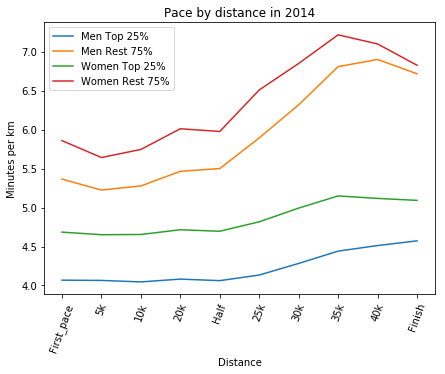

In [35]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by distance in 2014')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70) 
df_2014_m = df_full_2014.loc[(df_full_2014.Gender=='M') ]
df_2014_f = df_full_2014.loc[(df_full_2014.Gender=='F')]
df_2014_m_25 = df_2014_m.loc[df_2014_m.Official < df_2014_m.Official.quantile(.25)]
df_2014_m_rest = df_2014_m.loc[df_2014_m.Official >= df_2014_m.Official.quantile(.25)]
df_2014_f_25 = df_2014_f.loc[df_2014_f.Official < df_2014_f.Official.quantile(.25)]
df_2014_f_rest = df_2014_f.loc[df_2014_f.Official >= df_2014_f.Official.quantile(.25)]
df_2014_m_25_p = df_2014_m_25.iloc[:, 25:]
df_2014_m_25_p = df_2014_m_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2014_m_rest_p = df_2014_m_rest.iloc[:, 25:]
df_2014_m_rest_p = df_2014_m_rest_p.rename(columns=
                                           {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                            'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                            'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2014_f_25_p = df_2014_f_25.iloc[:, 25:]
df_2014_f_25_p = df_2014_f_25_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2014_f_rest_p = df_2014_f_rest.iloc[:, 25:]
df_2014_f_rest_p = df_2014_f_rest_p.rename(columns=
                                           {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                            'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                            'Pace_40k': '40k', 'Pace_Official': 'Finish'})

plt.plot(df_2014_m_25_p.mean(), label='Men Top 25%')
plt.plot(df_2014_m_rest_p.mean(), label='Men Rest 75%')
plt.plot(df_2014_f_25_p.mean(), label='Women Top 25%')
plt.plot(df_2014_f_rest_p.mean(), label='Women Rest 75%')
ax.legend()
plt.show()

## 7. Hit the wall analysis
### if any of the 5k pace in the second half > first half pace * 1.33, consider the person hit the wall.

### Hit the wall analysis - 2014

In [36]:
df_full_2014['First_pace'] = df_full_2014.Half/42.195*2
htw_25_2014 = df_full_2014[df_full_2014.Pace_25k > df_full_2014.First_pace * 1.33]
htw_30_2014 = df_full_2014[df_full_2014.Pace_30k > df_full_2014.First_pace * 1.33]
htw_35_2014 = df_full_2014[df_full_2014.Pace_35k > df_full_2014.First_pace * 1.33]
htw_40_2014 = df_full_2014[df_full_2014.Pace_40k > df_full_2014.First_pace * 1.33]
htw_42_2014 = df_full_2014[df_full_2014.Pace_Official > df_full_2014.First_pace * 1.33]

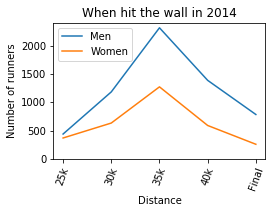

In [68]:
htw_25_2014_m = htw_25_2014.loc[(htw_25_2014.Gender == 'M')]
htw_30_2014_m = htw_30_2014.loc[(htw_30_2014.Gender == 'M')]
htw_35_2014_m = htw_35_2014.loc[(htw_35_2014.Gender == 'M')]
htw_40_2014_m = htw_40_2014.loc[(htw_40_2014.Gender == 'M')]
htw_42_2014_m = htw_42_2014.loc[(htw_42_2014.Gender == 'M')]

htw_30_again_2014_m = pd.merge(htw_25_2014_m, htw_30_2014_m, on=['Bib', 'Year'], how='inner')
htw_35_again_2014_m = pd.merge(pd.merge(htw_25_2014_m, htw_30_2014_m, on=['Bib', 'Year'], how='outer'), htw_35_2014_m, on=['Bib', 'Year'], how='inner')
htw_40_again_2014_m = pd.merge(pd.merge(pd.merge(htw_25_2014_m, htw_30_2014_m, on=['Bib', 'Year'], how='outer'), htw_35_2014_m, on=['Bib', 'Year'], how='outer'), htw_40_2014_m, on=['Bib', 'Year'], how='inner')
htw_42_again_2014_m = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2014_m, htw_30_2014_m, on=['Bib', 'Year'], how='outer'), htw_35_2014_m, on=['Bib', 'Year'], how='outer'), htw_40_2014_m, on=['Bib', 'Year'], how='outer'), htw_42_2014_m, on=['Bib', 'Year'], how='inner')
list_2014_m = [len(htw_25_2014_m), len(htw_30_2014_m)-len(htw_30_again_2014_m), len(htw_35_2014_m)-len(htw_35_again_2014_m), len(htw_40_2014_m)-len(htw_40_again_2014_m), len(htw_42_2014_m)-len(htw_42_again_2014_m)]

#htw_count_2014_m = pd.Series(data=list_2014_m, index=second_half)
htw_count_2014_m = pd.Series(data=list_2014_m, index=second_half)

htw_25_2014_f = htw_25_2014.loc[(htw_25_2014.Gender == 'F')]
htw_30_2014_f = htw_30_2014.loc[(htw_30_2014.Gender == 'F')]
htw_35_2014_f = htw_35_2014.loc[(htw_35_2014.Gender == 'F')]
htw_40_2014_f = htw_40_2014.loc[(htw_40_2014.Gender == 'F')]
htw_42_2014_f = htw_42_2014.loc[(htw_42_2014.Gender == 'F')]

htw_30_again_2014_f = pd.merge(htw_25_2014_f, htw_30_2014_f, on=['Bib', 'Year'], how='inner')
htw_35_again_2014_f = pd.merge(pd.merge(htw_25_2014_f, htw_30_2014_f, on=['Bib', 'Year'], how='outer'), htw_35_2014_f, on=['Bib', 'Year'], how='inner')
htw_40_again_2014_f = pd.merge(pd.merge(pd.merge(htw_25_2014_f, htw_30_2014_f, on=['Bib', 'Year'], how='outer'), htw_35_2014_f, on=['Bib', 'Year'], how='outer'), htw_40_2014_f, on=['Bib', 'Year'], how='inner')
htw_42_again_2014_f = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2014_f, htw_30_2014_f, on=['Bib', 'Year'], how='outer'), htw_35_2014_f, on=['Bib', 'Year'], how='outer'), htw_40_2014_f, on=['Bib', 'Year'], how='outer'), htw_42_2014_f, on=['Bib', 'Year'], how='inner')

list_2014_f = [len(htw_25_2014_f), len(htw_30_2014_f)-len(htw_30_again_2014_f), len(htw_35_2014_f)-len(htw_35_again_2014_f), len(htw_40_2014_f)-len(htw_40_again_2014_f), len(htw_42_2014_f)-len(htw_42_again_2014_f)]
htw_count_2014_f = pd.Series(data=list_2014_f, index=second_half)

#ax.plot(htw_count_2014_m, label='men')
#plt.plot(htw_count_2014_f, label='women')
fig, ax = plt.subplots(figsize=(3.8,2.5))
ax.set_title('When hit the wall in 2014')
ax.set_xlabel('Distance')
ax.set_ylabel('Number of runners')
ax.set_ylim(0, 2400)
plt.xticks(rotation=70) 
plt.plot(htw_count_2014_m, label='Men')
plt.plot(htw_count_2014_f, label='Women')

ax.legend()
plt.show()

In [60]:
df_part2['First_pace'] = df_part2.Half/42.195*2

htw_25 = df_part2[df_part2.Pace_25k > df_part2.First_pace * 1.33]
htw_30 = df_part2[df_part2.Pace_30k > df_part2.First_pace * 1.33]
htw_35 = df_part2[df_part2.Pace_35k > df_part2.First_pace * 1.33]
htw_40 = df_part2[df_part2.Pace_40k > df_part2.First_pace * 1.33]
htw_42 = df_part2[df_part2.Pace_Official > df_part2.First_pace * 1.33]
df_htw = pd.concat([htw_25, htw_30, htw_35, htw_40, htw_42], ignore_index=True)
df_htw_25_30 = pd.merge(htw_25, htw_30, how='outer', on=['Bib', 'Year'])
df_htw_til_35 = pd.merge(df_htw_25_30, htw_35, how='outer', on=['Bib', 'Year'])
df_htw_til_40 = pd.merge(df_htw_til_35, htw_40, how='outer', on=['Bib', 'Year'])
#df_htw = pd.merge(df_htw_til_40, htw_42, how='outer', on=['Bib', 'Year'])

n_htw_25 = df_part2[df_part2.Pace_25k <= df_part2.First_pace * 1.33]
n_htw_30 = df_part2[df_part2.Pace_30k <= df_part2.First_pace * 1.33]
n_htw_35 = df_part2[df_part2.Pace_35k <= df_part2.First_pace * 1.33]
n_htw_40 = df_part2[df_part2.Pace_40k <= df_part2.First_pace * 1.33]
n_htw_42 = df_part2[df_part2.Pace_Official <= df_part2.First_pace * 1.33]
df_n_htw = pd.concat([n_htw_25, n_htw_30, n_htw_35, n_htw_40, n_htw_42], ignore_index=True)
df_htw

,Bib,Name,Age,Gender,City,State,Country,Citizen,5k,10k,...,Pace_10k,Pace_15k,Pace_20k,Pace_Half,Pace_25k,Pace_30k,Pace_35k,Pace_40k,Pace_Official,First_pace
0,389,"Kovalchick, Christopher",31,M,Bedford,MA,USA,NaN,21.400000,42.200000,...,4.160000,4.143333,4.166667,4.115414,6.008969,4.610000,4.710000,4.743333,4.601367,4.183750
1,7151,"Johnsen, Mark T",43,M,Mountain View,CA,USA,NaN,22.250000,44.800000,...,4.510000,4.503333,4.583333,4.525437,7.132180,5.026667,5.070000,5.350000,5.375854,4.512383
2,6344,"McCaffrey, Padraig",41,M,Philadelphia,PA,USA,GBR,22.150000,44.050000,...,4.380000,4.490000,6.260000,4.783599,6.974162,5.186667,5.310000,4.906667,4.236902,4.884465
3,31506,"Carr, Lucas S.",35,M,Boston,MA,USA,NaN,21.783333,46.450000,...,4.933333,5.220000,5.580000,5.406226,6.901559,NaN,NaN,NaN,NaN,5.042462
4,13823,"Herman, Russell W",53,M,Hilton,NY,USA,NaN,24.200000,48.500000,...,4.860000,4.760000,4.833333,5.634017,6.683750,5.413333,5.383333,5.296667,5.299924,4.865505
5,6817,"Chauvin, Ted",41,M,Spokane,WA,USA,NaN,21.450000,43.200000,...,4.350000,4.403333,4.590000,4.631739,5.983344,5.473333,5.760000,NaN,NaN,4.419955
6,29394,"McDonough, Matthew K.",19,M,Framingham,MA,USA,NaN,NaN,45.250000,...,NaN,4.406667,4.813333,5.087320,6.273756,6.076667,6.396667,6.606667,6.211086,4.594541
7,15499,"Fithian, Lauren E.",26,F,Chestnut Hill,MA,USA,NaN,24.416667,49.316667,...,4.980000,4.966667,5.040000,4.996203,7.217596,5.706667,5.906667,5.783333,5.216401,4.968993
8,1390,"Miyamotto, Bruno",41,M,Mexico City,NaN,MEX,NaN,20.383333,40.733333,...,4.070000,4.106667,4.213333,4.813971,7.422592,6.700000,7.643333,6.616667,6.302202,4.152941
9,3496,"Williams, Josh M.",40,M,Geneseo,NY,USA,NaN,21.200000,42.366667,...,4.233333,4.193333,4.266667,4.312832,6.781977,6.446667,8.753333,6.933333,5.337889,4.237469


### Hit the wall analysis - 2015 plotting the pace

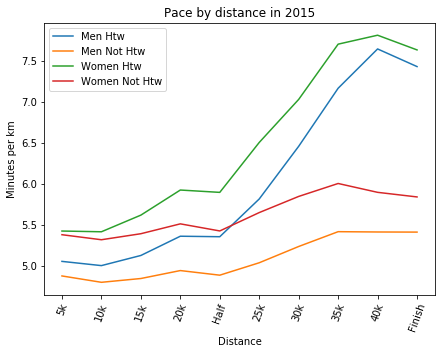

In [63]:
df_2015_htw_m = df_htw.loc[(df_htw.Year == 2015) & (df_htw.Gender == 'M')]
df_2015_htw_m_p = df_2015_htw_m.iloc[:, 24:34]
df_2015_htw_m_p = df_2015_htw_m_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2015_n_htw_m = df_n_htw.loc[(df_n_htw.Year == 2015) & (df_n_htw.Gender == 'M')]
df_2015_n_htw_m_p = df_2015_n_htw_m.iloc[:, 24:34]
df_2015_n_htw_m_p = df_2015_n_htw_m_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2015_htw_f = df_htw.loc[(df_htw.Year == 2015) & (df_htw.Gender == 'F')]
df_2015_htw_f_p = df_2015_htw_f.iloc[:, 24:34]
df_2015_htw_f_p = df_2015_htw_f_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2015_n_htw_f = df_n_htw.loc[(df_n_htw.Year == 2015) & (df_n_htw.Gender == 'F')]
df_2015_n_htw_f_p = df_2015_n_htw_f.iloc[:, 24:34]
df_2015_n_htw_f_p = df_2015_n_htw_f_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by distance in 2015')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70) 
plt.plot(df_2015_htw_m_p.mean(), label='Men Htw')
plt.plot(df_2015_n_htw_m_p.mean(), label='Men Not Htw')
plt.plot(df_2015_htw_f_p.mean(), label='Women Htw')
plt.plot(df_2015_n_htw_f_p.mean(), label='Women Not Htw')
ax.legend()
plt.show()

In [403]:
print("the number of participants in 2015 for men: ", len(df_2015_m))
print("the number of participants in 2015 for women: ", len(df_2015_f))
print("the number of participants in 2015 for men who hit the wall", len(df_2015_htw_m))
print("the number of participants in 2015 for women who hit the wall", len(df_2015_htw_f))

the number of participants in 2015 for men:  14581
the number of participants in 2015 for women:  12017
the number of participants in 2015 for men who hit the wall 3643
the number of participants in 2015 for women who hit the wall 1290


#### Analysis:
We determine that someone hits the wall if their pace in any of the second-half segments of the race slows by at least 33%, relative to their pace during the first-half of the race.
In 2015, 3,643 men runners hit the wall, which was 25% of the runners while 1,290 women runners did, which was just 10.7% of the runners. Men are more likely to be positive split runners.

### Hit the wall analysis 2015 Men - when hit the wall

In [72]:
second_half = ['25k', '30k', '35k', '40k', 'Final']
first_half = ['Pace_10k', 'Pace_15k', 'Pace_20k', 'Pace_Half']
#second_half = ['htw_25', 'htw_30', 'htw_35', 'htw_40', 'htw_42']
htw_25_2015_m = htw_25.loc[(htw_25.Year == 2015) & (htw_25.Gender == 'M')]
htw_30_2015_m = htw_30.loc[(htw_30.Year == 2015) & (htw_30.Gender == 'M')]
htw_35_2015_m = htw_35.loc[(htw_35.Year == 2015) & (htw_35.Gender == 'M')]
htw_40_2015_m = htw_40.loc[(htw_40.Year == 2015) & (htw_40.Gender == 'M')]
htw_42_2015_m = htw_42.loc[(htw_42.Year == 2015) & (htw_42.Gender == 'M')]

htw_30_again_2015_m = pd.merge(htw_25_2015_m, htw_30_2015_m, on=['Bib', 'Year'], how='inner')
htw_35_again_2015_m = pd.merge(pd.merge(htw_25_2015_m, htw_30_2015_m, on=['Bib', 'Year'], how='outer'), htw_35_2015_m, on=['Bib', 'Year'], how='inner')
htw_40_again_2015_m = pd.merge(pd.merge(pd.merge(htw_25_2015_m, htw_30_2015_m, on=['Bib', 'Year'], how='outer'), htw_35_2015_m, on=['Bib', 'Year'], how='outer'), htw_40_2015_m, on=['Bib', 'Year'], how='inner')
htw_42_again_2015_m = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2015_m, htw_30_2015_m, on=['Bib', 'Year'], how='outer'), htw_35_2015_m, on=['Bib', 'Year'], how='outer'), htw_40_2015_m, on=['Bib', 'Year'], how='outer'), htw_42_2015_m, on=['Bib', 'Year'], how='inner')
list_2015_m = [len(htw_25_2015_m), len(htw_30_2015_m)-len(htw_30_again_2015_m), 
                              len(htw_35_2015_m)-len(htw_35_again_2015_m), len(htw_40_2015_m)-len(htw_40_again_2015_m), 
                              len(htw_42_2015_m)-len(htw_42_again_2015_m)]
htw_count_2015_m = pd.DataFrame(data=list_2015_m, index=second_half)



#### Analysis:
When did men runners hit the wall in 2015? Around 600 runners hit the wall for the first time in the race between 30K and 35K. As it is often said, there is a big wall around 30k or 20 miles. In addition to the pacing, it is important to run 30k or 20 miles periodically before the race. 

### Hit the wall analysis 2015 Women - when hit the wall

In [76]:
htw_25_2015_f = htw_25.loc[(htw_25.Year == 2015) & (htw_25.Gender == 'F')]
htw_30_2015_f = htw_30.loc[(htw_30.Year == 2015) & (htw_30.Gender == 'F')]
htw_35_2015_f = htw_35.loc[(htw_35.Year == 2015) & (htw_35.Gender == 'F')]
htw_40_2015_f = htw_40.loc[(htw_40.Year == 2015) & (htw_40.Gender == 'F')]
htw_42_2015_f = htw_42.loc[(htw_42.Year == 2015) & (htw_42.Gender == 'F')]

htw_30_again_2015_f = pd.merge(htw_25_2015_f, htw_30_2015_f, on=['Bib', 'Year'], how='inner')
htw_35_again_2015_f = pd.merge(pd.merge(htw_25_2015_f, htw_30_2015_f, on=['Bib', 'Year'], how='outer'), htw_35_2015_f, on=['Bib', 'Year'], how='inner')
htw_40_again_2015_f = pd.merge(pd.merge(pd.merge(htw_25_2015_f, htw_30_2015_f, on=['Bib', 'Year'], how='outer'), htw_35_2015_f, on=['Bib', 'Year'], how='outer'), htw_40_2015_f, on=['Bib', 'Year'], how='inner')
htw_42_again_2015_f = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2015_f, htw_30_2015_f, on=['Bib', 'Year'], how='outer'), htw_35_2015_f, on=['Bib', 'Year'], how='outer'), htw_40_2015_f, on=['Bib', 'Year'], how='outer'), htw_42_2015_f, on=['Bib', 'Year'], how='inner')

list_2015_f = [len(htw_25_2015_f), len(htw_30_2015_f)-len(htw_30_again_2015_f), len(htw_35_2015_f)-len(htw_35_again_2015_f), len(htw_40_2015_f)-len(htw_40_again_2015_f), len(htw_42_2015_f)-len(htw_42_again_2015_f)]
htw_count_2015_f = pd.Series(data=list_2015_f, index=second_half)
#plt.plot(htw_count_2015_f)

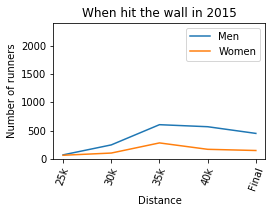

In [69]:
fig, ax = plt.subplots(figsize=(3.8,2.5))
ax.set_title('When hit the wall in 2015')
ax.set_xlabel('Distance')
ax.set_ylabel('Number of runners')
plt.xticks(rotation=70) 
plt.plot(htw_count_2015_m, label='Men')
plt.plot(htw_count_2015_f, label='Women')
ax.set_ylim(0, 2400)
ax.legend()
plt.show()

#### Analysis:
Women runners show the same trend as men runners. There is a big wall between 30k and 35k.

### Hit the wall analysis 2016 Men - when hit the wall

In [74]:
htw_25_2016_m = htw_25.loc[(htw_25.Year == 2016) & (htw_25.Gender == 'M')]
htw_30_2016_m = htw_30.loc[(htw_30.Year == 2016) & (htw_30.Gender == 'M')]
htw_35_2016_m = htw_35.loc[(htw_35.Year == 2016) & (htw_35.Gender == 'M')]
htw_40_2016_m = htw_40.loc[(htw_40.Year == 2016) & (htw_40.Gender == 'M')]
htw_42_2016_m = htw_42.loc[(htw_42.Year == 2016) & (htw_42.Gender == 'M')]

htw_30_again_2016_m = pd.merge(htw_25_2016_m, htw_30_2016_m, on=['Bib', 'Year'], how='inner')
htw_35_again_2016_m = pd.merge(pd.merge(htw_25_2016_m, htw_30_2016_m, on=['Bib', 'Year'], how='outer'), htw_35_2016_m, on=['Bib', 'Year'], how='inner')
htw_40_again_2016_m = pd.merge(pd.merge(pd.merge(htw_25_2016_m, htw_30_2016_m, on=['Bib', 'Year'], how='outer'), htw_35_2016_m, on=['Bib', 'Year'], how='outer'), htw_40_2016_m, on=['Bib', 'Year'], how='inner')
htw_42_again_2016_m = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2016_m, htw_30_2016_m, on=['Bib', 'Year'], how='outer'), htw_35_2016_m, on=['Bib', 'Year'], how='outer'), htw_40_2016_m, on=['Bib', 'Year'], how='outer'), htw_42_2016_m, on=['Bib', 'Year'], how='inner')
list_2016_m = [len(htw_25_2016_m), len(htw_30_2016_m)-len(htw_30_again_2016_m), len(htw_35_2016_m)-len(htw_35_again_2016_m), len(htw_40_2016_m)-len(htw_40_again_2016_m), len(htw_42_2016_m)-len(htw_42_again_2016_m)]

#htw_count_2016_m = pd.Series(data=list_2016_m, index=second_half)
htw_count_2016_m = pd.Series(data=list_2016_m, index=second_half)
#plt.plot(htw_count_2016_m)

### Hit the wall analysis 2016 Women - when hit the wall

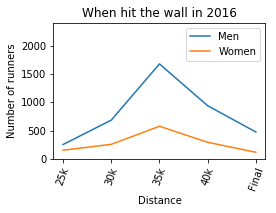

In [70]:
htw_25_2016_f = htw_25.loc[(htw_25.Year == 2016) & (htw_25.Gender == 'F')]
htw_30_2016_f = htw_30.loc[(htw_30.Year == 2016) & (htw_30.Gender == 'F')]
htw_35_2016_f = htw_35.loc[(htw_35.Year == 2016) & (htw_35.Gender == 'F')]
htw_40_2016_f = htw_40.loc[(htw_40.Year == 2016) & (htw_40.Gender == 'F')]
htw_42_2016_f = htw_42.loc[(htw_42.Year == 2016) & (htw_42.Gender == 'F')]

htw_30_again_2016_f = pd.merge(htw_25_2016_f, htw_30_2016_f, on=['Bib', 'Year'], how='inner')
htw_35_again_2016_f = pd.merge(pd.merge(htw_25_2016_f, htw_30_2016_f, on=['Bib', 'Year'], how='outer'), htw_35_2016_f, on=['Bib', 'Year'], how='inner')
htw_40_again_2016_f = pd.merge(pd.merge(pd.merge(htw_25_2016_f, htw_30_2016_f, on=['Bib', 'Year'], how='outer'), htw_35_2016_f, on=['Bib', 'Year'], how='outer'), htw_40_2016_f, on=['Bib', 'Year'], how='inner')
htw_42_again_2016_f = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2016_f, htw_30_2016_f, on=['Bib', 'Year'], how='outer'), htw_35_2016_f, on=['Bib', 'Year'], how='outer'), htw_40_2016_f, on=['Bib', 'Year'], how='outer'), htw_42_2016_f, on=['Bib', 'Year'], how='inner')

list_2016_f = [len(htw_25_2016_f), len(htw_30_2016_f)-len(htw_30_again_2016_f), len(htw_35_2016_f)-len(htw_35_again_2016_f), len(htw_40_2016_f)-len(htw_40_again_2016_f), len(htw_42_2016_f)-len(htw_42_again_2016_f)]
htw_count_2016_f = pd.Series(data=list_2016_f, index=second_half)

#ax.plot(htw_count_2016_m, label='men')
#plt.plot(htw_count_2016_f, label='women')
fig, ax = plt.subplots(figsize=(3.8,2.5))
ax.set_title('When hit the wall in 2016')
ax.set_xlabel('Distance')
ax.set_ylabel('Number of runners')
ax.set_ylim(0, 2400)
plt.xticks(rotation=70) 
plt.plot(htw_count_2016_m, label='Men')
plt.plot(htw_count_2016_f, label='Women')

ax.legend()
plt.show()

### Hit the wall analysis 2016 plotting the pace

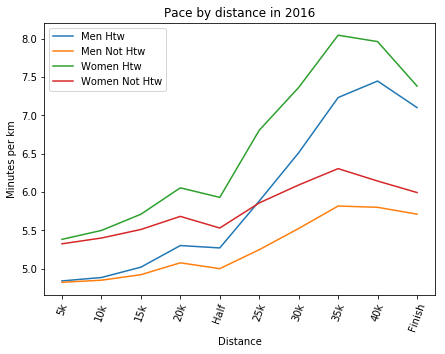

In [62]:
df_2016_htw_m = df_htw.loc[(df_htw.Year == 2016) & (df_htw.Gender == 'M')]
df_2016_htw_m_p = df_2016_htw_m.iloc[:, 24:34]
df_2016_htw_m_p = df_2016_htw_m_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2016_n_htw_m = df_n_htw.loc[(df_n_htw.Year == 2016) & (df_n_htw.Gender == 'M')]
df_2016_n_htw_m_p = df_2016_n_htw_m.iloc[:, 24:34]
df_2016_n_htw_m_p = df_2016_n_htw_m_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2016_htw_f = df_htw.loc[(df_htw.Year == 2016) & (df_htw.Gender == 'F')]
df_2016_htw_f_p = df_2016_htw_f.iloc[:, 24:34]
df_2016_htw_f_p = df_2016_htw_f_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2016_n_htw_f = df_n_htw.loc[(df_n_htw.Year == 2016) & (df_n_htw.Gender == 'F')]
df_2016_n_htw_f_p = df_2016_n_htw_f.iloc[:, 24:34]
df_2016_n_htw_f_p = df_2016_n_htw_f_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by distance in 2016')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70) 
plt.plot(df_2016_htw_m_p.mean(), label='Men Htw')
plt.plot(df_2016_n_htw_m_p.mean(), label='Men Not Htw')
plt.plot(df_2016_htw_f_p.mean(), label='Women Htw')
plt.plot(df_2016_n_htw_f_p.mean(), label='Women Not Htw')
ax.legend()
plt.show()

In [422]:
print("the number of participants in 2016 for men: ", len(df_2016_m))
print("the number of participants in 2016 for women: ", len(df_2016_f))
print("the number of participants in 2016 for men who hit the wall", len(df_2016_htw_m))
print("the number of participants in 2016 for women who hit the wall", len(df_2016_htw_f))

the number of participants in 2016 for men:  14463
the number of participants in 2016 for women:  12167
the number of participants in 2016 for men who hit the wall 8440
the number of participants in 2016 for women who hit the wall 2440


## Hit the wall analysis 2017 plotting the pace

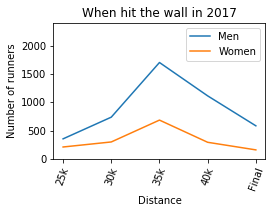

2601


In [71]:
htw_25_2017_m = htw_25.loc[(htw_25.Year == 2017) & (htw_25.Gender == 'M')]
htw_30_2017_m = htw_30.loc[(htw_30.Year == 2017) & (htw_30.Gender == 'M')]
htw_35_2017_m = htw_35.loc[(htw_35.Year == 2017) & (htw_35.Gender == 'M')]
htw_40_2017_m = htw_40.loc[(htw_40.Year == 2017) & (htw_40.Gender == 'M')]
htw_42_2017_m = htw_42.loc[(htw_42.Year == 2017) & (htw_42.Gender == 'M')]

htw_30_again_2017_m = pd.merge(htw_25_2017_m, htw_30_2017_m, on=['Bib', 'Year'], how='inner')
htw_35_again_2017_m = pd.merge(pd.merge(htw_25_2017_m, htw_30_2017_m, on=['Bib', 'Year'], how='outer'), htw_35_2017_m, on=['Bib', 'Year'], how='inner')
htw_40_again_2017_m = pd.merge(pd.merge(pd.merge(htw_25_2017_m, htw_30_2017_m, on=['Bib', 'Year'], how='outer'), htw_35_2017_m, on=['Bib', 'Year'], how='outer'), htw_40_2017_m, on=['Bib', 'Year'], how='inner')
htw_42_again_2017_m = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2017_m, htw_30_2017_m, on=['Bib', 'Year'], how='outer'), htw_35_2017_m, on=['Bib', 'Year'], how='outer'), htw_40_2017_m, on=['Bib', 'Year'], how='outer'), htw_42_2017_m, on=['Bib', 'Year'], how='inner')
list_2017_m = [len(htw_25_2017_m), len(htw_30_2017_m)-len(htw_30_again_2017_m), len(htw_35_2017_m)-len(htw_35_again_2017_m), len(htw_40_2017_m)-len(htw_40_again_2017_m), len(htw_42_2017_m)-len(htw_42_again_2017_m)]

#htw_count_2017_m = pd.Series(data=list_2017_m, index=second_half)
htw_count_2017_m = pd.Series(data=list_2017_m, index=second_half)

htw_25_2017_f = htw_25.loc[(htw_25.Year == 2017) & (htw_25.Gender == 'F')]
htw_30_2017_f = htw_30.loc[(htw_30.Year == 2017) & (htw_30.Gender == 'F')]
htw_35_2017_f = htw_35.loc[(htw_35.Year == 2017) & (htw_35.Gender == 'F')]
htw_40_2017_f = htw_40.loc[(htw_40.Year == 2017) & (htw_40.Gender == 'F')]
htw_42_2017_f = htw_42.loc[(htw_42.Year == 2017) & (htw_42.Gender == 'F')]

htw_30_again_2017_f = pd.merge(htw_25_2017_f, htw_30_2017_f, on=['Bib', 'Year'], how='inner')
htw_35_again_2017_f = pd.merge(pd.merge(htw_25_2017_f, htw_30_2017_f, on=['Bib', 'Year'], how='outer'), htw_35_2017_f, on=['Bib', 'Year'], how='inner')
htw_40_again_2017_f = pd.merge(pd.merge(pd.merge(htw_25_2017_f, htw_30_2017_f, on=['Bib', 'Year'], how='outer'), htw_35_2017_f, on=['Bib', 'Year'], how='outer'), htw_40_2017_f, on=['Bib', 'Year'], how='inner')
htw_42_again_2017_f = pd.merge(pd.merge(pd.merge(pd.merge(htw_25_2017_f, htw_30_2017_f, on=['Bib', 'Year'], how='outer'), htw_35_2017_f, on=['Bib', 'Year'], how='outer'), htw_40_2017_f, on=['Bib', 'Year'], how='outer'), htw_42_2017_f, on=['Bib', 'Year'], how='inner')

list_2017_f = [len(htw_25_2017_f), len(htw_30_2017_f)-len(htw_30_again_2017_f), len(htw_35_2017_f)-len(htw_35_again_2017_f), len(htw_40_2017_f)-len(htw_40_again_2017_f), len(htw_42_2017_f)-len(htw_42_again_2017_f)]
htw_count_2017_f = pd.Series(data=list_2017_f, index=second_half)

#ax.plot(htw_count_2017_m, label='men')
#plt.plot(htw_count_2017_f, label='women')
fig, ax = plt.subplots(figsize=(3.8,2.5))
ax.set_title('When hit the wall in 2017')
ax.set_xlabel('Distance')
ax.set_ylabel('Number of runners')
ax.set_ylim(0, 2400)
plt.xticks(rotation=70) 
plt.plot(htw_count_2017_m, label='Men')
plt.plot(htw_count_2017_f, label='Women')

ax.legend()
plt.show()

print(len(htw_42_2017_m))

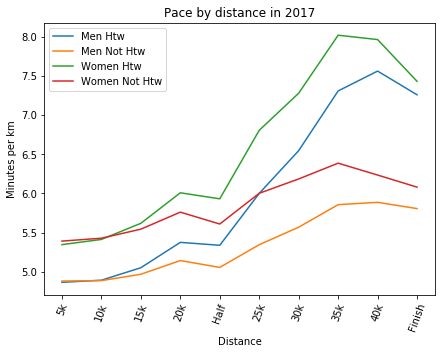

In [481]:
df_2017_htw_m = df_htw.loc[(df_htw.Year == 2017) & (df_htw.Gender == 'M')]
df_2017_htw_m_p = df_2017_htw_m.iloc[:, 24:34]
df_2017_htw_m_p = df_2017_htw_m_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2017_n_htw_m = df_n_htw.loc[(df_n_htw.Year == 2017) & (df_n_htw.Gender == 'M')]
df_2017_n_htw_m_p = df_2017_n_htw_m.iloc[:, 24:34]
df_2017_n_htw_m_p = df_2017_n_htw_m_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2017_htw_f = df_htw.loc[(df_htw.Year == 2017) & (df_htw.Gender == 'F')]
df_2017_htw_f_p = df_2017_htw_f.iloc[:, 24:34]
df_2017_htw_f_p = df_2017_htw_f_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

df_2017_n_htw_f = df_n_htw.loc[(df_n_htw.Year == 2017) & (df_n_htw.Gender == 'F')]
df_2017_n_htw_f_p = df_2017_n_htw_f.iloc[:, 24:34]
df_2017_n_htw_f_p = df_2017_n_htw_f_p.rename(columns=
                                       {'Pace_5k': '5k', 'Pace_10k': '10k', 'Pace_15k': '15k', 'Pace_20k': '20k', 
                                        'Pace_Half': 'Half', 'Pace_25k': '25k', 'Pace_30k': '30k', 'Pace_35k': '35k', 
                                        'Pace_40k': '40k', 'Pace_Official': 'Finish'})

fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Pace by distance in 2017')
ax.set_xlabel('Distance')
ax.set_ylabel('Minutes per km')
plt.xticks(rotation=70) 
plt.plot(df_2017_htw_m_p.mean(), label='Men Htw')
plt.plot(df_2017_n_htw_m_p.mean(), label='Men Not Htw')
plt.plot(df_2017_htw_f_p.mean(), label='Women Htw')
plt.plot(df_2017_n_htw_f_p.mean(), label='Women Not Htw')
ax.legend()
plt.show()

In [484]:
print("the number of participants in 2017 for men: ", len(df_2017_m))
print("the number of participants in 2017 for women: ", len(df_2017_f))
print("the number of participants in 2017 for men who hit the wall", len(df_2017_htw_m))
print("the number of participants in 2017 for women who hit the wall", len(df_2017_htw_f))

num_2017_htw = pd.DataFrame({'men': {'total': len(df_2017_m), 'Htw': len(df_2017_htw_m)}, 'women': {'total': len(df_2017_f), 'Htw': len(df_2017_htw_f)}})
num_2017_htw = num_2017_htw.T
num_2017_htw["ratio"] = num_2017_htw.Htw/num_2017_htw.total
num_2017_htw

the number of participants in 2017 for men:  14438
the number of participants in 2017 for women:  11972
the number of participants in 2017 for men who hit the wall 9583
the number of participants in 2017 for women who hit the wall 2918


,Htw,total,ratio
men,9583,14438,0.663735
women,2918,11972,0.243735


## pace difference between pace_half and pace_official

In [22]:
print(df_2015_m_25_p.Finish.mean()/df_2015_m_25_p.Half.mean())
print(df_2015_m_rest_p.Finish.mean()/df_2015_m_rest_p.Half.mean())

1.0750047162462677
1.1354096005141816


In [23]:
print(df_2015_f_25_p.Finish.mean()/df_2015_f_25_p.Half.mean())
print(df_2015_f_rest_p.Finish.mean()/df_2015_f_rest_p.Half.mean())

1.063007036147063
1.0867161721646272


In [272]:
print(df_2016_m_25_p.Pace_Official.mean()/df_2016_m_25_p.Pace_Half.mean())
print(df_2016_m_rest_p.Pace_Official.mean()/df_2016_m_rest_p.Pace_Half.mean())

1.1230581582787684
1.1787401498235648


In [273]:
print(df_2016_f_25_p.Pace_Official.mean()/df_2016_f_25_p.Pace_Half.mean())
print(df_2016_f_rest_p.Pace_Official.mean()/df_2016_f_rest_p.Pace_Half.mean())

1.0638549439767193
1.097631009172338


In [24]:
print(df_2017_m_25_p.Finish.mean()/df_2017_m_25_p.Half.mean())
print(df_2017_m_rest_p.Finish.mean()/df_2017_m_rest_p.Half.mean())

1.1251016803953464
1.1915625332220934


In [44]:
drop_ratio_2014_m_25 = (1- df_2014_m_25_p.Finish.mean()/df_2014_m_25_p.Half.mean())*100
drop_ratio_2014_m_rest =(1-  df_2014_m_rest_p.Finish.mean()/df_2014_m_rest_p.Half.mean())*100

drop_ratio_2015_m_25 = (1- df_2015_m_25_p.Finish.mean()/df_2015_m_25_p.Half.mean())*100
drop_ratio_2015_m_rest =(1-  df_2015_m_rest_p.Finish.mean()/df_2015_m_rest_p.Half.mean())*100

drop_ratio_2016_m_25 = (1- df_2016_m_25_p.Finish.mean()/df_2016_m_25_p.Half.mean())*100
drop_ratio_2016_m_rest =(1-  df_2016_m_rest_p.Finish.mean()/df_2016_m_rest_p.Half.mean())*100

drop_ratio_2017_m_25 = (1- df_2017_m_25_p.Finish.mean()/df_2017_m_25_p.Half.mean())*100
drop_ratio_2017_m_rest = (1- df_2017_m_rest_p.Finish.mean()/df_2017_m_rest_p.Half.mean())*100

drop_ratio_df_m = pd.DataFrame({'2014': {'top 25': '{0:.2f}%'.format(drop_ratio_2014_m_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2014_m_rest)}, 
                                '2015': {'top 25': '{0:.2f}%'.format(drop_ratio_2015_m_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2015_m_rest)},
                             '2016': {'top 25': '{0:.2f}%'.format(drop_ratio_2016_m_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2016_m_rest)},
                             '2017': {'top 25': '{0:.2f}%'.format(drop_ratio_2017_m_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2017_m_rest)}})
drop_ratio_df_m

,2014,2015,2016,2017
the rest,-22.11%,-13.54%,-17.87%,-19.16%
top 25,-12.57%,-7.50%,-12.31%,-12.51%


In [40]:
drop_ratio_2014_f_25 = (1- df_2014_f_25_p.Finish.mean()/df_2014_f_25_p.Half.mean())*100
drop_ratio_2014_f_rest =(1-  df_2014_f_rest_p.Finish.mean()/df_2014_f_rest_p.Half.mean())*100

drop_ratio_2015_f_25 = (1- df_2015_f_25_p.Finish.mean()/df_2015_f_25_p.Half.mean())*100
drop_ratio_2015_f_rest =(1-  df_2015_f_rest_p.Finish.mean()/df_2015_f_rest_p.Half.mean())*100

drop_ratio_2016_f_25 = (1- df_2016_f_25_p.Finish.mean()/df_2016_f_25_p.Half.mean())*100
drop_ratio_2016_f_rest =(1-  df_2016_f_rest_p.Finish.mean()/df_2016_f_rest_p.Half.mean())*100

drop_ratio_2017_f_25 = (1- df_2017_f_25_p.Finish.mean()/df_2017_f_25_p.Half.mean())*100
drop_ratio_2017_f_rest = (1- df_2017_f_rest_p.Finish.mean()/df_2017_f_rest_p.Half.mean())*100

drop_ratio_df_f = pd.DataFrame({'2014': {'top 25': '{0:.2f}%'.format(drop_ratio_2014_f_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2014_f_rest)}, 
                                '2015': {'top 25': '{0:.2f}%'.format(drop_ratio_2015_f_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2015_f_rest)},
                             '2016': {'top 25': '{0:.2f}%'.format(drop_ratio_2016_f_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2016_f_rest)},
                             '2017': {'top 25': '{0:.2f}%'.format(drop_ratio_2017_f_25), 'the rest': '{0:.2f}%'.format(drop_ratio_2017_f_rest)}})
drop_ratio_df_f

,2014,2015,2016,2017
the rest,-14.22%,-8.67%,-9.76%,-9.78%
top 25,-8.44%,-6.30%,-6.39%,-7.33%


Text(0, 0.5, 'Percent of drop')

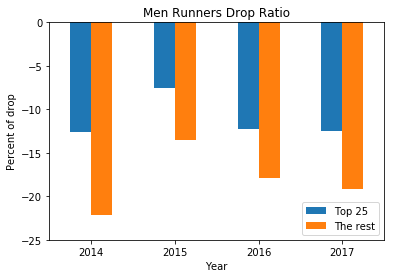

In [52]:
drop_ratio_df_m_lst = pd.DataFrame({'Year': ['2014', '2015', '2016', '2017'], 
                                    'Top 25': [drop_ratio_2014_m_25, drop_ratio_2015_m_25, drop_ratio_2016_m_25, drop_ratio_2017_m_25],
                                   'The rest': [drop_ratio_2014_m_rest, drop_ratio_2015_m_rest, drop_ratio_2016_m_rest, drop_ratio_2017_m_rest]})
ax = drop_ratio_df_m_lst.plot.bar(x='Year', y=['Top 25', 'The rest'], rot=0)
ax.set_ylim(-25, 0)
ax.set_title('Men Runners Drop Ratio')
ax.set_ylabel('Percent of drop')

Text(0, 0.5, 'Percent of drop')

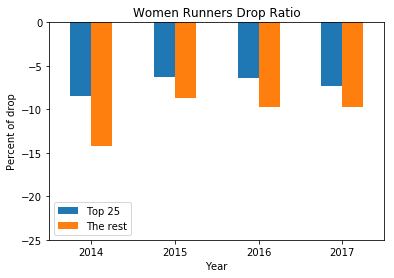

In [75]:
drop_ratio_df_f_lst = pd.DataFrame({'Year': ['2014', '2015', '2016', '2017'], 
                                    'Top 25': [drop_ratio_2014_f_25, drop_ratio_2015_f_25, drop_ratio_2016_f_25, drop_ratio_2017_f_25],
                                   'The rest': [drop_ratio_2014_f_rest, drop_ratio_2015_f_rest, drop_ratio_2016_f_rest, drop_ratio_2017_f_rest]})

#fig, ax = plt.subplots()
ax = drop_ratio_df_f_lst.plot.bar(x='Year', y=['Top 25', 'The rest'], rot=0)
#df_r = ax.bar(drop_ratio_df_f_lst, x='Year', y=['Top 25', 'The rest'], rot=0)
ax.set_ylim(-25, 0)
ax.set_title('Women Runners Drop Ratio')
ax.set_ylabel('Percent of drop')

In [363]:
distance = ['5k', '10k', '20k', 'Half', '25k', '30k', '35k', '40k', 'Official']
for col in distance: 
    df_2014 = df_2014[df_2014[col] != '-'] 
df_2014.head()

,Bib,Name,Age,Gender,City,State,Country,Ctz,5k,10k,...,Half,25k,30k,35k,40k,Pace,Official,Overall,Genderdiv,Division
0,W1,"Yamamoto, Hiroyuki",47,M,Fukuoka,NaN,JPN,NaN,8.02,17.37,...,39.72,47.67,59.18,71.4,80.43,3.27,85.25,8,8,8
1,F1,"Jeptoo, Rita",33,F,Eldoret,NaN,KEN,NaN,16.22,32.58,...,69.47,82.43,99.33,116.37,132.1,5.30,138.95,21,1,1
2,W2,"Van Dyk, Ernst F.",41,M,Paarl,NaN,RSA,NaN,7.75,16.62,...,38.03,45.8,56.45,67.42,76.1,3.08,80.60,1,1,1
3,F2,"Dibaba, Mare",24,F,Shoa,NaN,ETH,NaN,16.2,32.57,...,69.47,82.43,99.33,116.37,132.95,5.37,140.58,27,3,3
4,W3,"Hokinoue, Kota",40,M,Nogata Fukuoka,NaN,JPN,NaN,8.02,17.12,...,38.6,46.37,57.03,67.83,76.72,3.10,81.23,2,2,2


In [365]:
for col in distance: 
    df_2014[col] = df_2014[col].astype(float)
df_2014.head()

,Bib,Name,Age,Gender,City,State,Country,Ctz,5k,10k,...,Half,25k,30k,35k,40k,Pace,Official,Overall,Genderdiv,Division
0,W1,"Yamamoto, Hiroyuki",47,M,Fukuoka,NaN,JPN,NaN,8.02,17.37,...,39.72,47.67,59.18,71.40,80.43,3.27,85.25,8,8,8
1,F1,"Jeptoo, Rita",33,F,Eldoret,NaN,KEN,NaN,16.22,32.58,...,69.47,82.43,99.33,116.37,132.10,5.30,138.95,21,1,1
2,W2,"Van Dyk, Ernst F.",41,M,Paarl,NaN,RSA,NaN,7.75,16.62,...,38.03,45.80,56.45,67.42,76.10,3.08,80.60,1,1,1
3,F2,"Dibaba, Mare",24,F,Shoa,NaN,ETH,NaN,16.20,32.57,...,69.47,82.43,99.33,116.37,132.95,5.37,140.58,27,3,3
4,W3,"Hokinoue, Kota",40,M,Nogata Fukuoka,NaN,JPN,NaN,8.02,17.12,...,38.60,46.37,57.03,67.83,76.72,3.10,81.23,2,2,2
